## Task 1

1. Train 4 different classifiers using _sklearn_ library to predict _"Activity"_ (biological response of the molecule) 
    field from the [_"bioresponse.csv"_](./bioresponse.csv) dataset:
    - [small decision tree](#Small-decision-tree);
    - [deep decision tree](#Deep-decision-tree);
    - [random forest on small trees](#Random-forest-on-small-trees);
    - [random forest on deep trees](#Random-forest-on-deep-trees).
    

In [72]:
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, roc_auc_score
)
from matplotlib import pyplot as plt

In [8]:
bio_df = pandas.read_csv("./bioresponse.csv")
bio_df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [77]:
x_vec = bio_df.loc[:, "D1":"D1776"]
y_vec = bio_df["Activity"]

x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.3, random_state=42)

### Small decision tree

precision = 0.784; recall = 0.805; accuracy = 0.766
f1 = 0.794
log_loss = 8.067


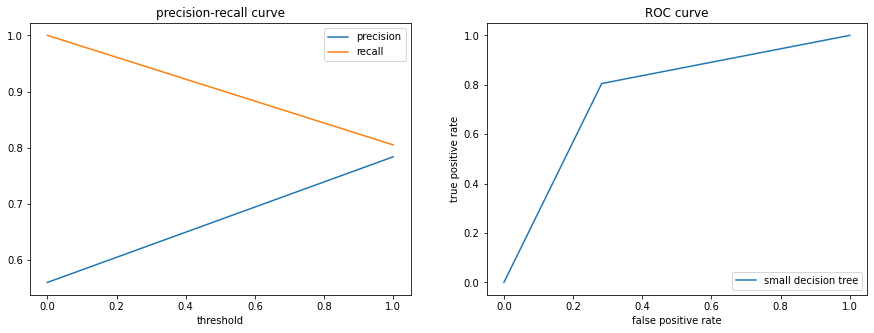

In [78]:
s_dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
s_dec_tree = s_dec_tree.fit(x_train, y_train)
y_pred = s_dec_tree.predict(x_test)

print("precision = {p:.3f}; recall = {r:.3f}; accuracy = {a:.3f}".format(
    p=precision_score(y_test, y_pred), r=recall_score(y_test, y_pred), a=accuracy_score(y_test, y_pred)
))
print("f1 = {f:.3f}".format(f=f1_score(y_test, y_pred)))
print("log_loss = {ll:.3f}".format(ll=log_loss(y_test, y_pred)))

fig, (ax_pr, ax_roc) = plt.subplots(1, 2, figsize=(15, 5))

precision, recall, threshold = precision_recall_curve(y_test, y_pred)
fpr, tpr, thr = roc_curve(y_test, y_pred)

ax_pr.plot(threshold, precision[:-1], label="precision")
ax_pr.plot(threshold, recall[:-1], label="recall")
ax_pr.set_xlabel("threshold")
ax_pr.set_title("precision-recall curve")
ax_pr.legend()

plt.plot(fpr, tpr, label="small decision tree")
ax_roc.set_xlabel("false positive rate")
ax_roc.set_ylabel("true positive rate")
ax_roc.set_title("ROC curve")
ax_roc.legend(loc=4)
# ax_roc.axis([-0.1, 1.1, -0.1, 1.1])

### Deep decision tree

In [ ]:
pass

### Random forest on small trees

In [ ]:
pass

### Random forest on deep trees

In [ ]:
pass